In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import metrics

from sklearn.metrics import mean_absolute_error
from math import sqrt

In [2]:
file = 'consumption'
area1 = 'DK1'
area2 = 'DK2'

fileName = file + '_'+area1
filePrognosisName = file + '_prognosis_'+area1
fileName2 = file + '_'+area2
filePrognosisName2 = file + '_prognosis_'+area2

data = pd.read_csv("../../../data/data_sanitized/"+fileName+".csv")
data_prognosis = pd.read_csv("../../../data/data_sanitized/"+filePrognosisName+".csv")
data2 = pd.read_csv("../../../data/data_sanitized/"+fileName2+".csv")
data_prognosis2 = pd.read_csv("../../../data/data_sanitized/"+filePrognosisName2+".csv")

#config
save_plots = True

dates = data['date']
data['date']= pd.to_datetime(data['date'],format='%Y-%m-%d')
data = data.drop(columns=['holiday','date'])
data_prognosis['date']= pd.to_datetime(data_prognosis['date'],format='%Y-%m-%d')
data_prognosis = data_prognosis.drop(columns=['holiday','date'])
data2['date']= pd.to_datetime(data2['date'],format='%Y-%m-%d')
data2 = data2.drop(columns=['holiday','date'])
data_prognosis2['date']= pd.to_datetime(data_prognosis2['date'],format='%Y-%m-%d')
data_prognosis2 = data_prognosis2.drop(columns=['holiday','date'])


str_week_list = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
str_month_list = ['January','February','March','April','May','June','July','August','September','October','November','December']
ylabel = 'Mean Square Error [MWh]'

title = {}
title['rmse_day_in_year'] = 'MAE for each day'
title['sma_rmse_day_in_year'] = 'SMA MAE for 7 days window'
title['rmse_month_in_year'] = 'Mean Absolute Error for each month'
title['rmse_hour_in_year'] = 'Mean Absolute Error for each hour'
title['rmse_year'] = 'Mean Absolute Error for each year'

data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1818.0,1741.0,1660.0,1593.0,1545.0,1552.0,1605.0,1663.0,1733.0,1809.0,...,2043.0,2088.0,2312.0,2433.0,2481.0,2335.0,2149.0,2000.0,1858.0,1713.0
1,1615.0,1510.0,1461.0,1463.0,1476.0,1579.0,1683.0,1883.0,2026.0,2157.0,...,2295.0,2266.0,2464.0,2703.0,2651.0,2435.0,2264.0,2092.0,2027.0,1822.0
2,1724.0,1665.0,1671.0,1619.0,1642.0,1669.0,1810.0,1986.0,2177.0,2195.0,...,2323.0,2373.0,2603.0,2896.0,2803.0,2621.0,2450.0,2294.0,2127.0,1998.0
3,1844.0,1803.0,1789.0,1819.0,1903.0,2056.0,2434.0,2966.0,3100.0,3059.0,...,2876.0,2864.0,2977.0,3198.0,3047.0,2919.0,2698.0,2463.0,2293.0,2079.0
4,1940.0,1891.0,1952.0,1957.0,2031.0,2162.0,2559.0,3020.0,3143.0,3052.0,...,2939.0,2864.0,3036.0,3300.0,3145.0,2928.0,2729.0,2562.0,2372.0,2193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,1839.0,1795.0,1765.0,1754.0,1779.0,1780.0,1861.0,2078.0,2215.0,2308.0,...,2259.0,2223.0,2204.0,2318.0,2340.0,2185.0,2055.0,2006.0,1957.0,1843.0
1590,1752.0,1691.0,1665.0,1654.0,1662.0,1672.0,1735.0,1890.0,2086.0,2198.0,...,2088.0,2040.0,2080.0,2249.0,2246.0,2131.0,2033.0,1990.0,1928.0,1793.0
1591,1721.0,1658.0,1635.0,1617.0,1620.0,1615.0,1691.0,1818.0,1975.0,2095.0,...,2172.0,2159.0,2154.0,2408.0,2444.0,2304.0,2193.0,2163.0,2108.0,2009.0
1592,1893.0,1827.0,1818.0,1872.0,1888.0,2027.0,2293.0,2580.0,2796.0,2820.0,...,2802.0,2669.0,2667.0,2837.0,2769.0,2597.0,2477.0,2343.0,2264.0,2117.0


In [3]:
data_prognosis

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1811.0,1765.0,1669.0,1597.0,1553.0,1560.0,1644.0,1694.0,1698.0,1801.0,...,2049.0,2095.0,2299.0,2479.0,2442.0,2329.0,2180.0,2026.0,1863.0,1753.0
1,1643.0,1556.0,1495.0,1486.0,1509.0,1589.0,1716.0,1894.0,2063.0,2164.0,...,2234.0,2283.0,2472.0,2712.0,2644.0,2416.0,2259.0,2099.0,1989.0,1855.0
2,1723.0,1667.0,1647.0,1627.0,1636.0,1669.0,1783.0,1961.0,2158.0,2251.0,...,2316.0,2351.0,2599.0,2902.0,2797.0,2618.0,2405.0,2269.0,2126.0,2000.0
3,1860.0,1777.0,1785.0,1803.0,1878.0,2065.0,2480.0,2963.0,3186.0,3188.0,...,2948.0,2854.0,2982.0,3207.0,3037.0,2889.0,2706.0,2497.0,2272.0,2072.0
4,1941.0,1881.0,1886.0,1929.0,2034.0,2156.0,2579.0,3053.0,3165.0,3077.0,...,2966.0,2876.0,3012.0,3289.0,3126.0,2943.0,2723.0,2551.0,2353.0,2146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,1845.0,1750.0,1728.0,1692.0,1722.0,1784.0,1858.0,2043.0,2227.0,2292.0,...,2254.0,2210.0,2208.0,2326.0,2306.0,2194.0,2078.0,2044.0,1936.0,1837.0
1590,1739.0,1672.0,1644.0,1654.0,1664.0,1681.0,1747.0,1899.0,2083.0,2196.0,...,2102.0,2060.0,2078.0,2210.0,2250.0,2117.0,2034.0,1997.0,1924.0,1819.0
1591,1702.0,1645.0,1627.0,1624.0,1628.0,1617.0,1676.0,1827.0,1987.0,2091.0,...,2141.0,2147.0,2165.0,2359.0,2427.0,2292.0,2204.0,2159.0,2112.0,2015.0
1592,1932.0,1826.0,1825.0,1867.0,1895.0,2038.0,2351.0,2623.0,2774.0,2861.0,...,2796.0,2672.0,2631.0,2765.0,2739.0,2600.0,2470.0,2396.0,2277.0,2143.0


In [4]:
#Plots
def draw_plot_dayofyear(data_frame, name='Plot', ylabel = ylabel):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    for year, new_df in data_frame.groupby(level=0):
        ax.plot(data_frame.loc[year], label=year)
    # set title and legend
    ax.set_title(name)
    ax.legend(prop={'size': 15})
    ax.set_xlabel('Day of year')
    ax.set_ylabel(ylabel)
    
def draw_plot_monthofyear(data_frame, name='Plot', ylabel = ylabel):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    for year, new_df in data_frame.groupby(level=0):
        ax.plot(data_frame.loc[year], label=year)
    # set title and legend
    ax.set_title(name)
    ax.legend(prop={'size': 15})
    ax.set_xlabel('Month')
    ax.set_ylabel(ylabel)
    ax.set_xticks(range(1,13))
    ax.set_xticklabels(str_month_list)
    
def draw_plot_hourofyear(data_frame, name='Plot', ylabel = ylabel):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    for year, new_df in data_frame.groupby(level=0):
        ax.plot(data_frame.loc[year], label=year)
    # set title and legend
    ax.set_title(name)
    ax.legend(prop={'size': 15})
    ax.set_xlabel('Hour')
    ax.set_ylabel(ylabel)
    ax.set_xticks(range(0,24))
    
def draw_simple_barplot_for_years(data_frame, name='Plot', ylabel = ylabel):
    fig, ax = plt.subplots()
    min_val = min(data_frame.iloc[:,0])
    max_val = max(data_frame.iloc[:,0])
    margin = (max_val - min_val)*3/10
    plt.ylim([min_val - margin,max_val + margin])
    ax.bar(data_frame.index,data_frame.iloc[:,0])
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.title(name)
    ax.set_xticks(data_frame.index)

In [5]:
def savePlot(name):
    if(save_plots):
        fileName = '../plots/'+ name + '_' + area
        plt.savefig(fileName, bbox_inches='tight')

In [6]:
mae = metrics.mean_absolute_error(data.loc[:,'0':'23'],data_prognosis.loc[:,'0':'23'], multioutput='raw_values')
mae

array([19.13425345, 24.27038896, 18.38739021, 15.5357591 , 14.62421581,
       16.17816813, 21.44291092, 23.01066499, 21.0727729 , 23.45043915,
       22.29611041, 20.27791719, 20.68067754, 19.69008783, 18.46110414,
       18.34002509, 19.39335006, 22.2327478 , 20.86386449, 19.23588457,
       21.46486826, 20.12421581, 20.91468005, 24.69196989])

In [8]:
rmse_on_months = mse.copy()
df = rmse_on_months
df['month'] = df['date'].dt.month
df = df.drop(columns=['date'])
df = df.set_index(['year','month']).stack().reset_index().rename(columns={"level_2": "hour",0:'rmse'})
df = df.drop(columns=['hour'])
df = df.groupby(['year','month']).agg(['sum','count'])
df = df['rmse']
df['rmse'] = np.sqrt((df['sum'] / df['count']))
df = df.drop(columns=['count','sum'])
rmse_on_months = df
rmse_on_months

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [13]:
def draw_plot_monthofyear(data_frame, name='Plot', ylabel = ylabel):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    for year, new_df in data_frame.groupby(level=0):
        ax.plot(data_frame.loc[year], label=year)
    # set title and legend
    ax.set_title(name)
    ax.legend(prop={'size': 15})
    ax.set_xlabel('Month')
    ax.set_ylabel(ylabel)
    ax.set_xticks(range(1,13))
    ax.set_xticklabels(str_month_list)

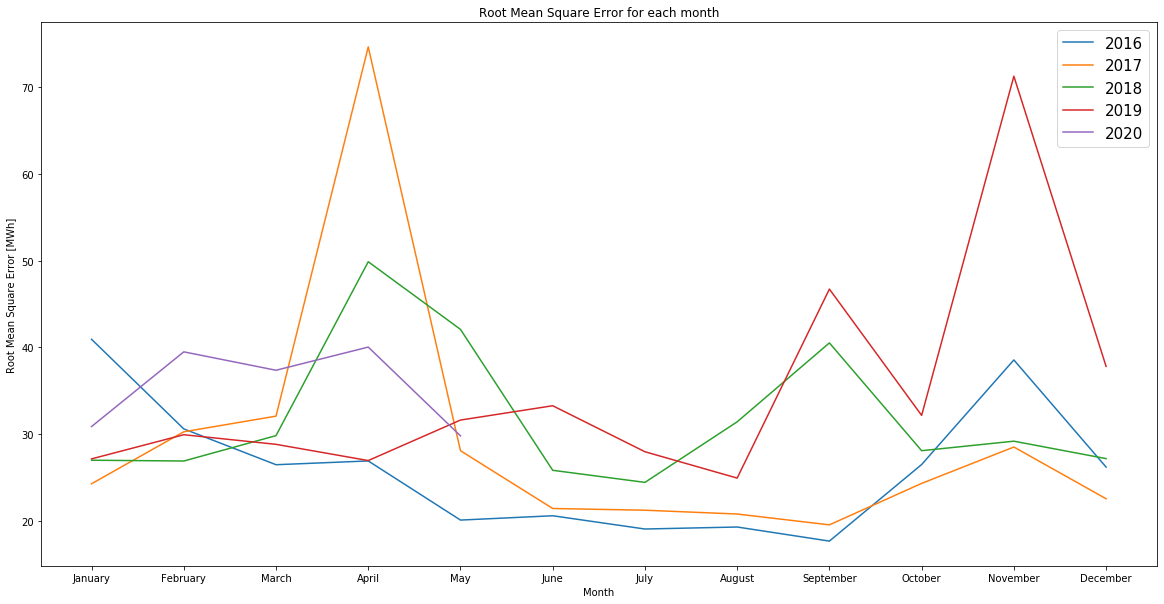

In [14]:
draw_plot_monthofyear(rmse_on_months, title['rmse_month_in_year'], ylabel)
savePlot('rms_month')

In [15]:
rmse_on_hours = mse.copy()
df = rmse_on_hours
df = df.drop(columns=['date'])
df = df.set_index(['year']).stack().reset_index().rename(columns={"level_1": "hour",0:'mse'})
df = df.groupby(['year','hour']).agg(['sum','count'])
df = df['mse']
df['rmse'] = np.sqrt((df['sum'] / df['count']))
df = df.drop(columns=['sum','count'])
df.index = df.index.set_levels(df.index.levels[1].astype(int),level=1)
df = df.sort_index()
rmse_on_hours = df
rmse_on_hours.index.levels[:-1]
rmse_on_hours.index.levels[0]
rmse_on_hours

rmse
year hour           
2016 0     25.792997
     1     22.350230
     2     19.481128
     3     17.423133
     4     16.516592
...              ...
2020 19    31.541475
     20    35.978899
     21    30.886160
     22    36.921783
     23    43.934161

[120 rows x 1 columns]

In [16]:
def draw_plot_hourofyear(data_frame, name='Plot', ylabel = ylabel):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    for year, new_df in data_frame.groupby(level=0):
        ax.plot(data_frame.loc[year], label=year)
    # set title and legend
    ax.set_title(name)
    ax.legend(prop={'size': 15})
    ax.set_xlabel('Hour')
    ax.set_ylabel(ylabel)
    ax.set_xticks(range(0,24))

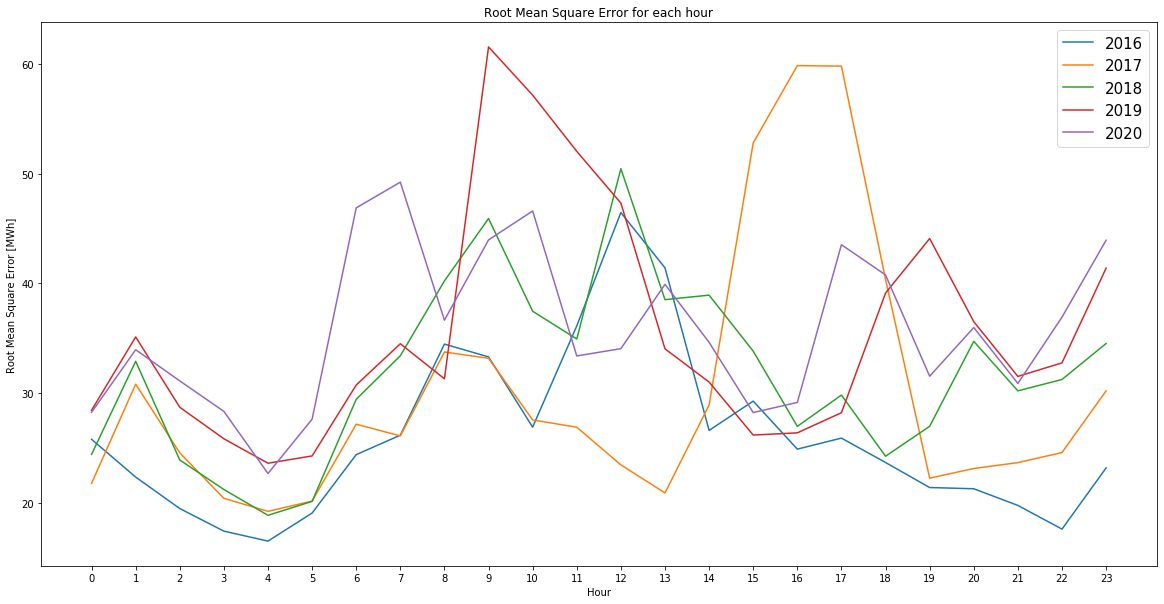

In [17]:
draw_plot_hourofyear(rmse_on_hours, title['rmse_hour_in_year'])
savePlot('rmse_hour')

In [18]:
rmse_for_year = mse.copy()
df = rmse_for_year
df = df.drop(columns=['date'])
df = df.set_index(['year']).stack().reset_index().rename(columns={"level_2": "hour",0:'mse'})
df = df.groupby(['year']).agg(['sum','count'])
df = df['mse']
df['rmse'] = np.sqrt((df['sum'] / df['count']))
df = df.drop(columns=['sum','count'])
rmse_for_year = df
rmse_for_year

,rmse
year,
2016,27.025180
2017,32.189249
2018,32.724736
2019,36.902095
2020,36.443407


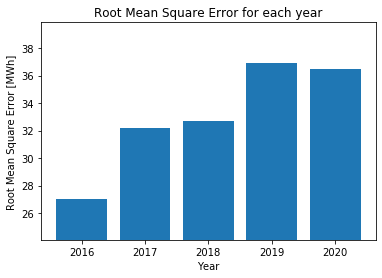

In [19]:
draw_simple_barplot_for_years(rmse_for_year,title['rmse_year'])
savePlot('rmse_year')

In [167]:
import seaborn as sns
from matplotlib.colors import ListedColormap

#mae - consumption
mae = np.ones((6,25))
mae[0,0:24] = metrics.mean_absolute_error(data2.loc[0:365,'0':'23'],data_prognosis2.loc[0:365,'0':'23'], multioutput='raw_values')
mae[1,0:24] = metrics.mean_absolute_error(data2.loc[366:730,'0':'23'],data_prognosis2.loc[366:730,'0':'23'], multioutput='raw_values')
mae[2,0:24] = metrics.mean_absolute_error(data2.loc[731:1096,'0':'23'],data_prognosis2.loc[731:1096,'0':'23'], multioutput='raw_values')
mae[3,0:24] = metrics.mean_absolute_error(data2.loc[1097:1461,'0':'23'],data_prognosis2.loc[1097:1461,'0':'23'], multioutput='raw_values')
mae[4,0:24] = metrics.mean_absolute_error(data2.loc[1462:,'0':'23'],data_prognosis2.loc[1462:,'0':'23'], multioutput='raw_values')
mae[5,0:24] = metrics.mean_absolute_error(data2.loc[:,'0':'23'],data_prognosis2.loc[:,'0':'23'], multioutput='raw_values')
mae[0,24] = metrics.mean_absolute_error(data2.loc[0:365,'0':'23'],data_prognosis2.loc[0:365,'0':'23'])
mae[1,24] = metrics.mean_absolute_error(data2.loc[366:730,'0':'23'],data_prognosis2.loc[366:730,'0':'23'])
mae[2,24] = metrics.mean_absolute_error(data2.loc[731:1096,'0':'23'],data_prognosis2.loc[731:1096,'0':'23'])
mae[3,24] = metrics.mean_absolute_error(data2.loc[1097:1461,'0':'23'],data_prognosis2.loc[1097:1461,'0':'23'])
mae[4,24] = metrics.mean_absolute_error(data2.loc[1462:,'0':'23'],data_prognosis2.loc[1462:,'0':'23'])
mae[5,24] = metrics.mean_absolute_error(data2.loc[:,'0':'23'],data_prognosis2.loc[:,'0':'23'])

df = pd.DataFrame.from_records(np.ones((6,25)))
df = pd.DataFrame.from_records(mae)
df['Area'] = ['DK2']*6
df['Year'] = ['2016','2017','2018','2019','2020','Total']
df = df.groupby(['Area','Year']).sum()
df = df.rename(columns={24:"Total"})
pd.set_option('precision', 1)

# cm = sns.color_palette('YlGn', as_cmap=True)
cm = ListedColormap(sns.color_palette('YlGn_r',20).as_hex())
df = df.style.background_gradient(cmap=cm,axis=1)

df

In [166]:
import seaborn as sns
from matplotlib.colors import ListedColormap

#mae - consumption
mae = np.ones((6,25))
mae[0,0:24] = metrics.mean_absolute_error(data.loc[0:365,'0':'23'],data_prognosis.loc[0:365,'0':'23'], multioutput='raw_values')
mae[1,0:24] = metrics.mean_absolute_error(data.loc[366:730,'0':'23'],data_prognosis.loc[366:730,'0':'23'], multioutput='raw_values')
mae[2,0:24] = metrics.mean_absolute_error(data.loc[731:1096,'0':'23'],data_prognosis.loc[731:1096,'0':'23'], multioutput='raw_values')
mae[3,0:24] = metrics.mean_absolute_error(data.loc[1097:1461,'0':'23'],data_prognosis.loc[1097:1461,'0':'23'], multioutput='raw_values')
mae[4,0:24] = metrics.mean_absolute_error(data.loc[1462:,'0':'23'],data_prognosis.loc[1462:,'0':'23'], multioutput='raw_values')
mae[5,0:24] = metrics.mean_absolute_error(data.loc[:,'0':'23'],data_prognosis.loc[:,'0':'23'], multioutput='raw_values')
mae[0,24] = metrics.mean_absolute_error(data.loc[0:365,'0':'23'],data_prognosis.loc[0:365,'0':'23'])
mae[1,24] = metrics.mean_absolute_error(data.loc[366:730,'0':'23'],data_prognosis.loc[366:730,'0':'23'])
mae[2,24] = metrics.mean_absolute_error(data.loc[731:1096,'0':'23'],data_prognosis.loc[731:1096,'0':'23'])
mae[3,24] = metrics.mean_absolute_error(data.loc[1097:1461,'0':'23'],data_prognosis.loc[1097:1461,'0':'23'])
mae[4,24] = metrics.mean_absolute_error(data.loc[1462:,'0':'23'],data_prognosis.loc[1462:,'0':'23'])
mae[5,24] = metrics.mean_absolute_error(data.loc[:,'0':'23'],data_prognosis.loc[:,'0':'23'])


df = pd.DataFrame.from_records(np.ones((6,25)))
df = pd.DataFrame.from_records(mae)
df['Area'] = ['DK1']*6
df['Year'] = ['2016','2017','2018','2019','2020','Total']
df = df.groupby(['Area','Year']).sum()
df = df.rename(columns={24:"Total"})
pd.set_option('precision', 1)

# cm = sns.color_palette('YlGn', as_cmap=True)
cm = ListedColormap(sns.color_palette('YlGn_r',20).as_hex())
df = df.style.background_gradient(cmap=cm,axis=1)

df

In [59]:
data.loc[1097:1461,'0':'23']

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
1097,1746.0,1691.0,1660.0,1677.0,1739.0,1851.0,2212.0,2532.0,2735.0,2799.0,...,2616.0,2626.0,2763.0,3045.0,2940.0,2730.0,2536.0,2369.0,2200.0,2054.0
1098,1977.0,1910.0,1908.0,1933.0,1988.0,2098.0,2439.0,2858.0,3005.0,2976.0,...,2870.0,2828.0,2964.0,3212.0,3053.0,2844.0,2649.0,2473.0,2303.0,2102.0
1099,2006.0,1947.0,1905.0,1938.0,1996.0,2154.0,2456.0,2867.0,3018.0,3001.0,...,2737.0,2696.0,2827.0,3001.0,2869.0,2626.0,2462.0,2286.0,2173.0,2031.0
1100,1932.0,1811.0,1790.0,1858.0,1805.0,1823.0,1907.0,2073.0,2242.0,2308.0,...,2235.0,2270.0,2451.0,2728.0,2646.0,2445.0,2294.0,2164.0,2005.0,1898.0
1101,1823.0,1767.0,1739.0,1729.0,1745.0,1764.0,1813.0,1961.0,2133.0,2264.0,...,2314.0,2342.0,2519.0,2776.0,2710.0,2496.0,2289.0,2203.0,2052.0,1894.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,1999.0,1930.0,1891.0,1882.0,1889.0,1933.0,2037.0,2210.0,2366.0,2461.0,...,2461.0,2482.0,2621.0,2744.0,2702.0,2546.0,2392.0,2307.0,2159.0,2030.0
1458,1969.0,1904.0,1852.0,1854.0,1856.0,1880.0,1997.0,2120.0,2288.0,2403.0,...,2442.0,2468.0,2604.0,2771.0,2725.0,2575.0,2470.0,2391.0,2275.0,2179.0
1459,2092.0,2021.0,1972.0,1947.0,1960.0,2041.0,2244.0,2390.0,2648.0,2693.0,...,2545.0,2638.0,2735.0,2926.0,2855.0,2715.0,2556.0,2401.0,2255.0,2089.0
1460,1966.0,1909.0,1874.0,1850.0,1894.0,1920.0,2005.0,2185.0,2326.0,2435.0,...,2329.0,2341.0,2533.0,2646.0,2561.0,2344.0,2185.0,2080.0,2000.0,1909.0
